# Blockchain Simulator Demonstration

This notebook provides a step-by-step demonstration of how to use the **Blockchain Simulator** to run simulations, analyze results, and visualize data.

## 1. Setup and Installation

Ensure that you have installed all prerequisites and dependencies as outlined in the [README](../README.md).

## 2. Running the Simulation

We will run the simulation for a specified time and number of nodes.

In [1]:
# Run the simulation
! mkdir data
!python blockchain_simulator.simulation

mkdir: data: File exists
/opt/homebrew/Cellar/python@3.13/3.13.0_1/Frameworks/Python.framework/Versions/3.13/Resources/Python.app/Contents/MacOS/Python: can't open file '/Users/marcfiani/git_projects/blockchain-simulator/notebooks/blockchain_simulator.simulation': [Errno 2] No such file or directory


## 3. Analyzing State Data

After running the simulation, the state data is saved in `data/state_data.csv`. Let's load and inspect it.

In [2]:
import pandas as pd

# Load the state data
state_df = pd.read_csv('data/state_data.csv')
state_df.head()

,time,node_id,chain_length
0,1.340240,2,1
1,3.218688,2,2
2,10.450590,2,3
3,10.872370,0,1
4,12.714267,1,1


## 4. Identifying Discontinuities

We identify discontinuities where the chain length increases by more than one.

In [3]:
# Identify discontinuities
state_df['chain_diff'] = state_df.groupby('node_id')['chain_length'].diff().fillna(0)
discontinuities = state_df[state_df['chain_diff'] > 1]
discontinuities.head()

,time,node_id,chain_length,chain_diff


## 5. Visualizing Chain Length Over Time

Using the visualization module to plot chain lengths and discontinuities.

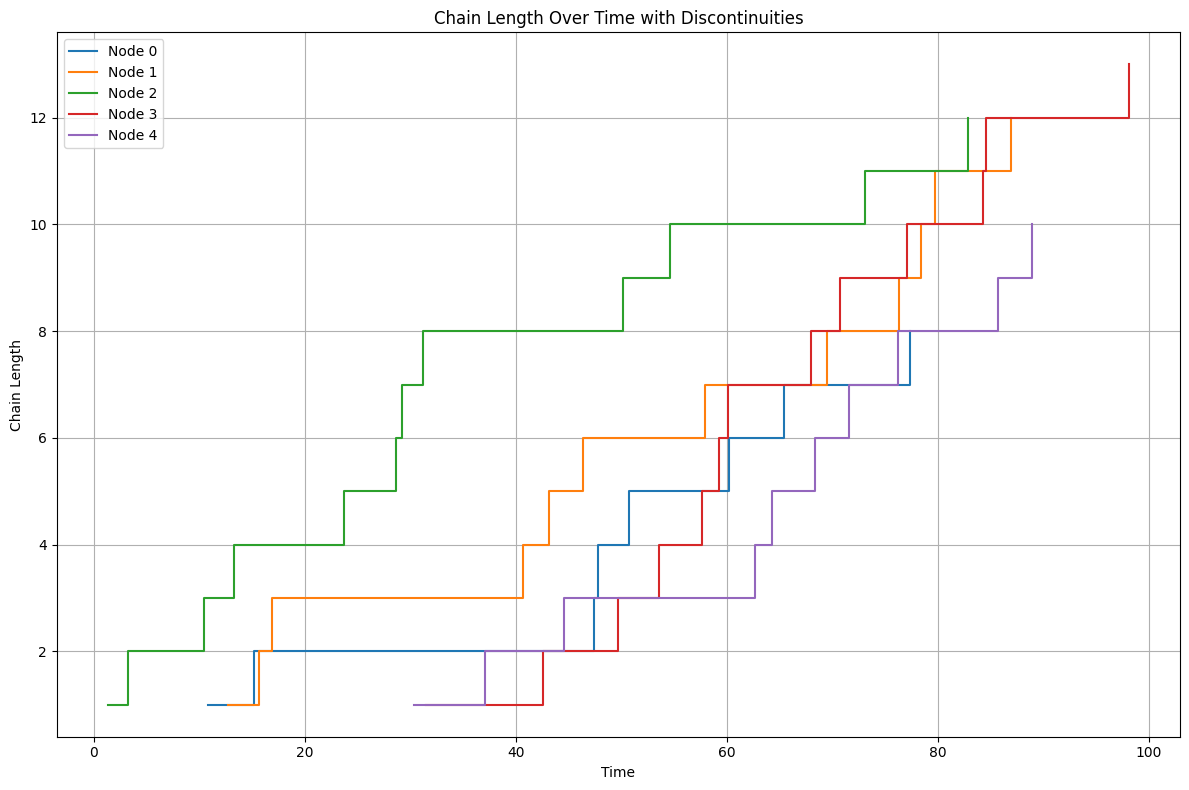

In [6]:
from blockchain_simulator.visualization import plot_chain_length

# Save discontinuities to CSV for visualization
discontinuities.to_csv('data/discontinuities.csv', index=False)
# create a plots folder
!mkdir plots
# Plot chain lengths with discontinuities
plot_chain_length(state_df, num_nodes=state_df['node_id'].nunique(), discontinuities=discontinuities)

## 6. Analyzing Graph Topology

We analyze the network graph to determine its minimum cut value.

The minimum cut of the network graph is 4.0


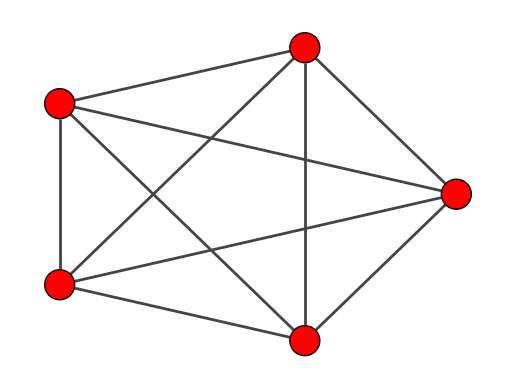

In [8]:
from blockchain_simulator.graph_analysis import analyze_graph

# Analyze the network graph
analyze_graph(num_nodes=5)

## 7. Running MLMC Simulation

Performing Multi-Level Monte Carlo simulations to estimate the average chain length.

In [9]:
from blockchain_simulator.mlmc import mlmc_simulation

levels = 3
samples_per_level = 10
simulation_time = 100
num_nodes = 5

mlmc_estimates = mlmc_simulation(levels, samples_per_level, simulation_time, num_nodes)
mlmc_estimates

Starting Level 0 with 10 samples...
Time 1.9117099207847406: Node 4 mined Block_1_Node_4
Time 9.504658438581796: Node 2 mined Block_1_Node_2
Time 10.117418453316219: Node 3 mined Block_1_Node_3
Time 13.933898385141553: Node 3 mined Block_2_Node_3
Time 14.048529598971784: Node 0 mined Block_1_Node_0
Time 18.966812753725804: Node 1 mined Block_1_Node_1
Time 20.38851683721829: Node 0 mined Block_2_Node_0
Time 21.48423311689598: Node 0 mined Block_3_Node_0
Time 22.815191836162267: Node 0 mined Block_4_Node_0
Time 22.928657000569657: Node 0 mined Block_5_Node_0
Time 26.57826001996243: Node 3 mined Block_3_Node_3
Time 30.900687334791936: Node 2 mined Block_2_Node_2
Time 34.23581391058447: Node 2 mined Block_3_Node_2
Time 37.11299802065012: Node 2 mined Block_4_Node_2
Time 38.80728322406264: Node 4 mined Block_2_Node_4
Time 41.8828752454123: Node 4 mined Block_3_Node_4
Time 45.32199364982065: Node 1 mined Block_2_Node_1
Time 45.328051202303826: Node 4 mined Block_4_Node_4
Time 50.740866772750

[np.float64(6.045589746428005),
 np.float64(5.922821994284618),
 np.float64(5.824663718461494)]

## 8. Visualizing MLMC Estimates

Plotting the MLMC estimates obtained from different levels.

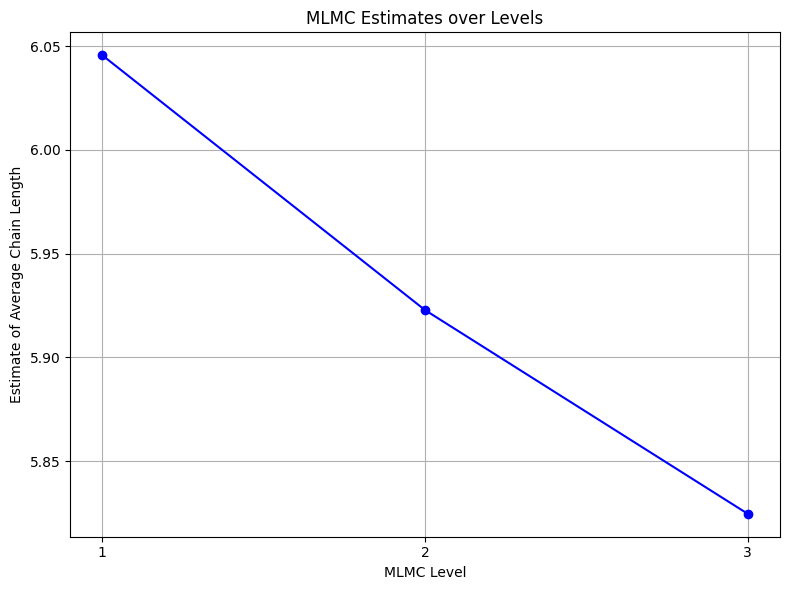

In [11]:
from blockchain_simulator.visualization import plot_mlmc_estimates

# Plot MLMC estimates
plot_mlmc_estimates(mlmc_estimates)

## 9. Visualizing the Network Graph

Visualizing the fully connected network graph.

In [12]:
from blockchain_simulator.visualization import visualize_graph

# Visualize the network graph
visualize_graph(num_nodes=5)

Network graph saved to plots/network_graph.png


## 10. Conclusion

This demonstration showcased how to run simulations, analyze data, and visualize results using the Blockchain Simulator. You can further extend the simulator by modifying parameters, enhancing analysis techniques, and integrating additional features.